

---

# ***Introducción***

Agua segura y disponible es importante para la salud pública, ya sea que se utilice para beber, uso doméstico, producción de alimentos o fines recreativos. El suministro de agua mejorado y el saneamiento, junto con una mejor gestión de los recursos hídricos, pueden impulsar el crecimiento económico de los países y contribuir en gran medida a la reducción de la pobreza.

El agua contaminada y el saneamiento deficiente están vinculados a la transmisión de enfermedades como el ***cólera, diarrea, disentería, hepatitis A, fiebre tifoidea y poliomielitis***. La falta, insuficiencia o mala gestión de los servicios de agua y saneamiento exponen a las personas a riesgos de salud prevenibles. Esto es especialmente crítico en las instalaciones de atención médica, donde tanto los pacientes como el personal están en mayor riesgo de infección y enfermedad cuando faltan servicios de agua, saneamiento e higiene. A nivel mundial, el 15% de los pacientes desarrollan una infección durante su estadía en el hospital, con una proporción mucho mayor en los países de bajos ingresos.

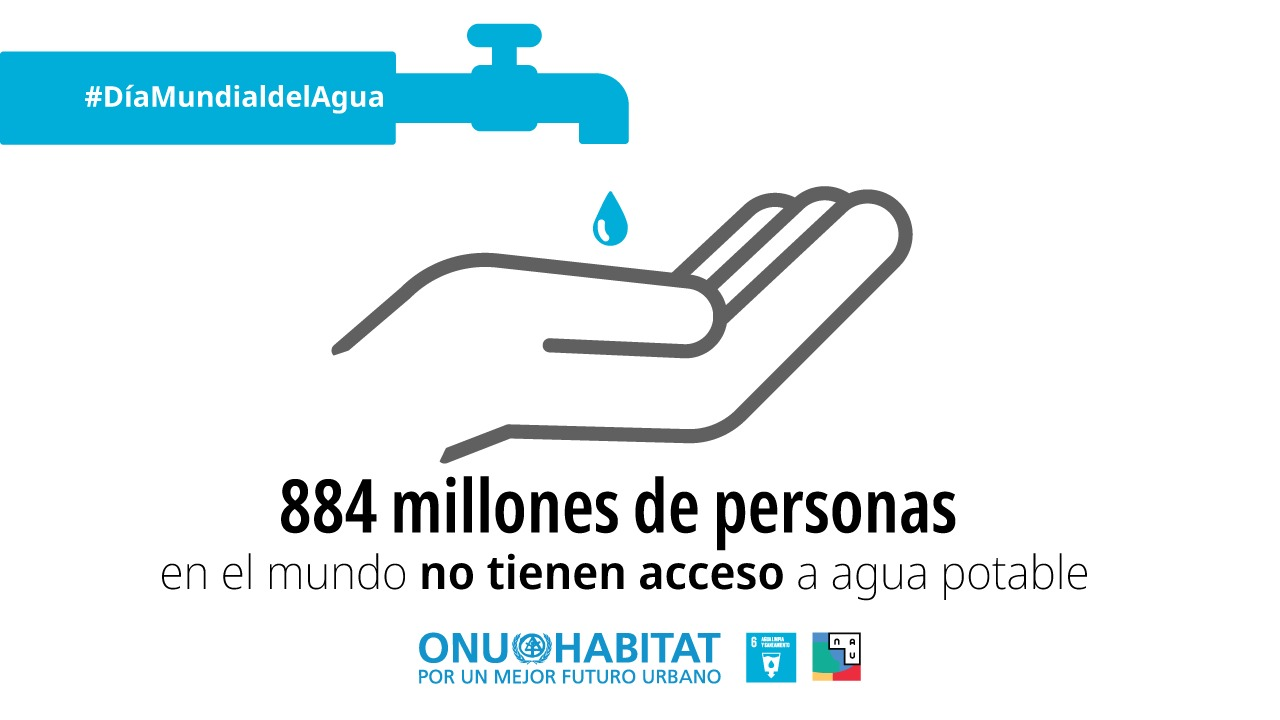

## ***Descripción del dataset***

1. ***ph***: pH del agua
2. ***Hardness (Dureza)***: Capacidad del agua para precipitar jabón, en mg/L.

3. ***Solids (Sólidos)***: Sólidos totales disueltos en ppm.

4. ***Chloramines (Cloraminas)***: Cantidad de cloraminas en ppm.

5. ***Sulfate (Sulfato)***: Cantidad de sulfatos disueltos en mg/L.

6. ***Conductivity (Conductividad)***: Conductividad eléctrica del agua en μS/cm.

7. ***Organic_carbon (Carbono orgánico
)***: Cantidad de carbono orgánico en ppm.

8. ***Trihalomethanes (Trihalometanos)***: Cantidad de trihalometanos en μg/L.

9. ***Turbidity (Turbidez)***: Medida de la propiedad de emisión de luz del agua en NTU.

10. ***Potability (Potabilidad)***: Indica si el agua es segura para el consumo humano. Potable - 1 y No potable - 0.




---



# ***Conjunto de datos***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial I/water_potability.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis=1)

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# ***Matriz de correlación***




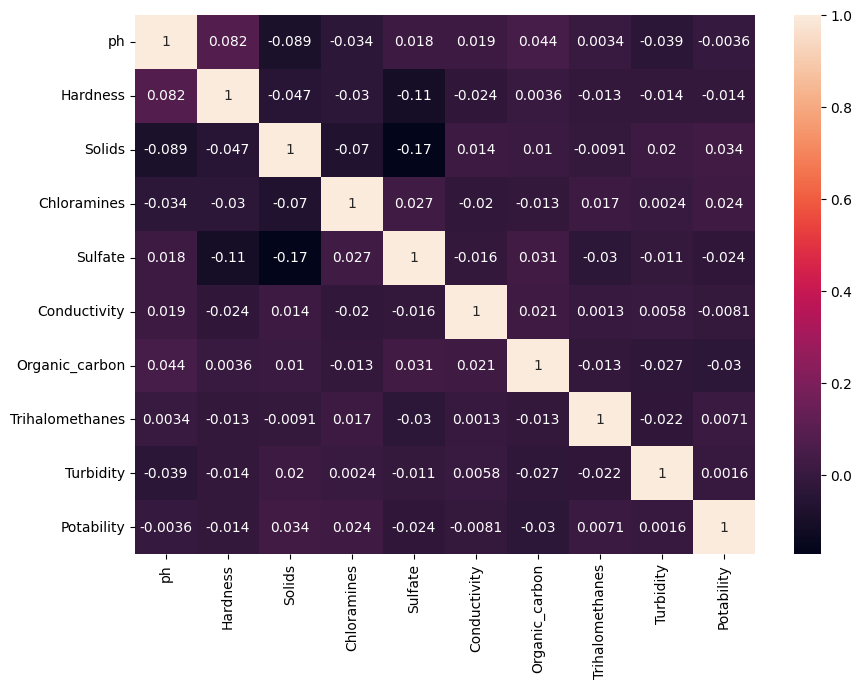

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

***GRÁFICAS***

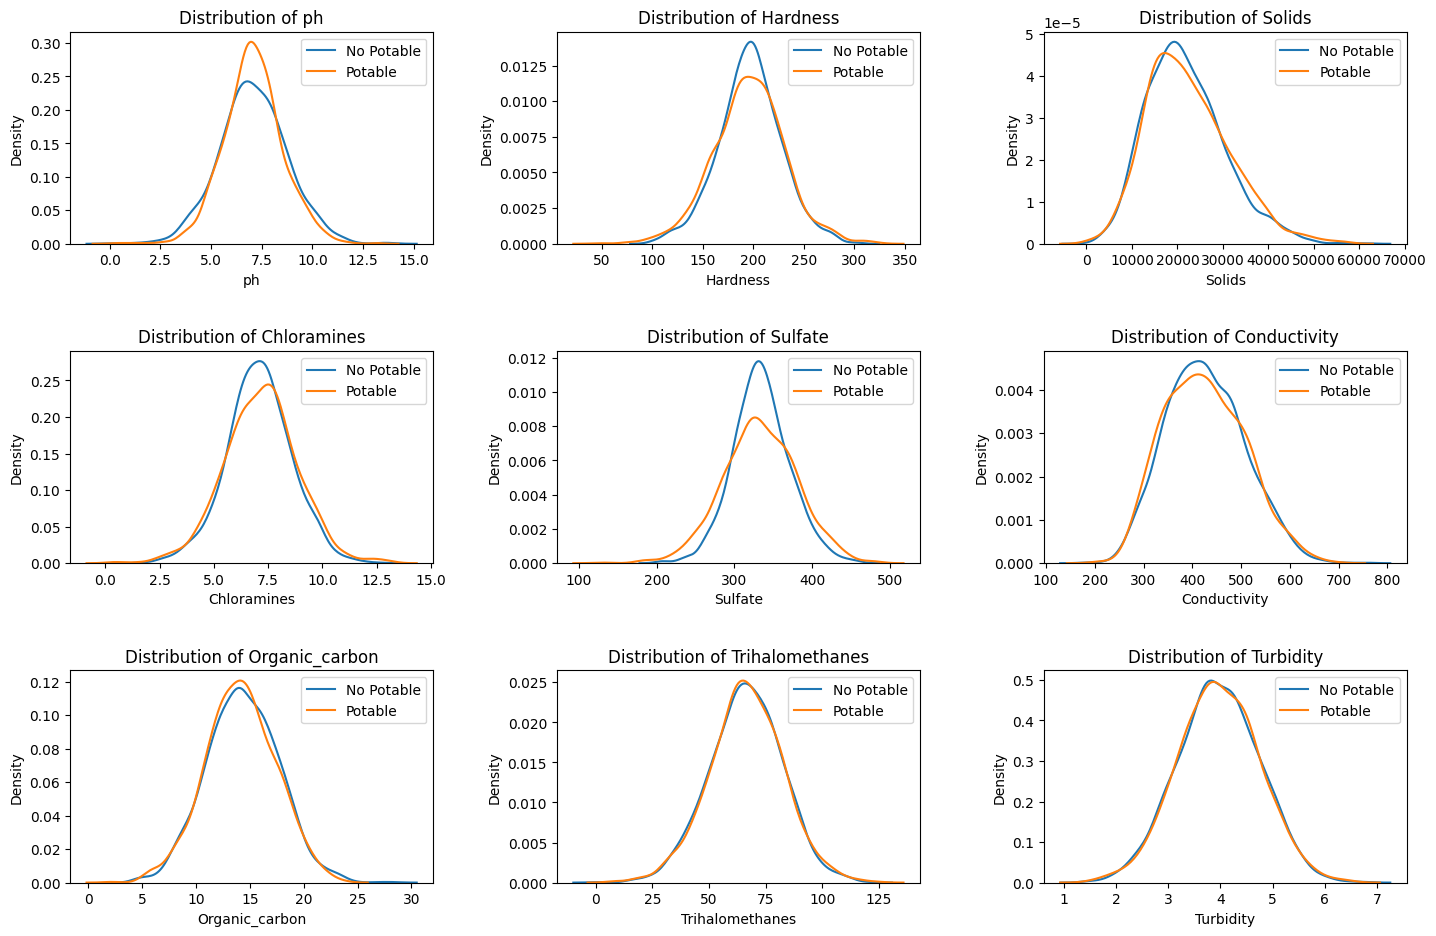

In [ ]:
plt.figure(figsize=(15, 10))

no_potable = df.query('Potability == 0')
potable = df.query('Potability == 1')

for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=no_potable[col], label='No Potable')
    sns.kdeplot(x=potable[col], label='Potable')
    plt.legend(prop=dict(size=10))


plt.tight_layout(pad=3.0)

plt.show()

***Potabilidad***

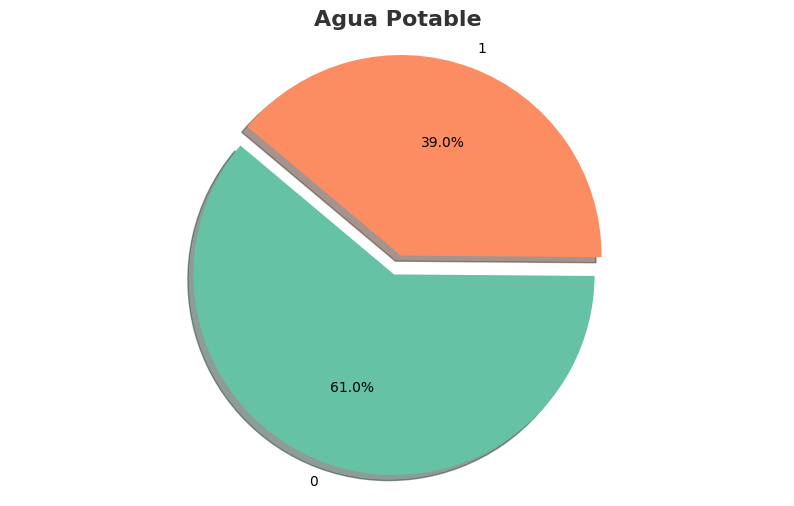

In [ ]:
potability_counts = df['Potability'].value_counts()

colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(potability_counts, labels=potability_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Agua Potable', fontsize=16, fontweight='bold', color='#333333')
plt.axis('equal')
plt.show()

# Estimadores

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import tensorflow as tf

# **Valores por defecto**

***DecisionTreeClassifier***

In [ ]:
X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = DecisionTreeClassifier()
est.fit(X_train,y_train)
dt = accuracy_score(est.predict(X_test), y_test)
print(dt)

0.5914634146341463


***RandomForestClassifier***

In [ ]:
X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = RandomForestClassifier()
est.fit(X_train,y_train)
rf = accuracy_score(est.predict(X_test), y_test)
print(rf)

0.6478658536585366


***SVC***

In [ ]:
df = df.dropna()

X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = SVC()
est.fit(X_train,y_train)
sv = accuracy_score(est.predict(X_test), y_test)
print(sv)

0.598014888337469


,Modelo,Accuracy_score
1,Random Forest,0.647866
2,SVM,0.598015
0,Decision Tree,0.591463


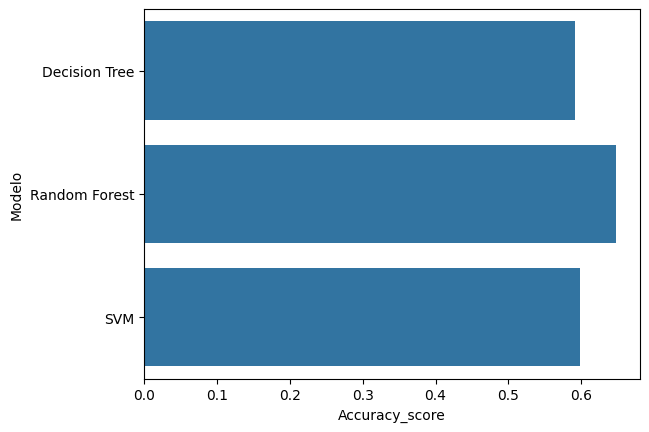

In [ ]:
models = pd.DataFrame({
    'Modelo':['Decision Tree', 'Random Forest','SVM'],
    'Accuracy_score' :[dt, rf, sv]
})
models
sns.barplot(x='Accuracy_score', y='Modelo', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

# Tunning de parámetros

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_and_plot_multiple_params(model, param_grid, X_train, y_train):
    for param_name, param_values in param_grid.items():
        means = []

        for value in param_values:
            model.set_params(**{param_name: value})
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))
            means.append(np.mean(scores))

        # Graficar
        plt.figure(figsize=(8, 5))
        plt.plot(param_values, means, marker="o", color="black", label="Media de precisión")
        plt.title(f"Resultados para {model.__class__.__name__} - {param_name}")
        plt.xlabel(param_name)
        plt.ylabel("Precisión")
        plt.xticks(param_values, rotation=45)
        plt.legend()
        plt.grid()
        plt.show()


***DecisionTreeClassifier***

Evaluando DecisionTreeClassifier


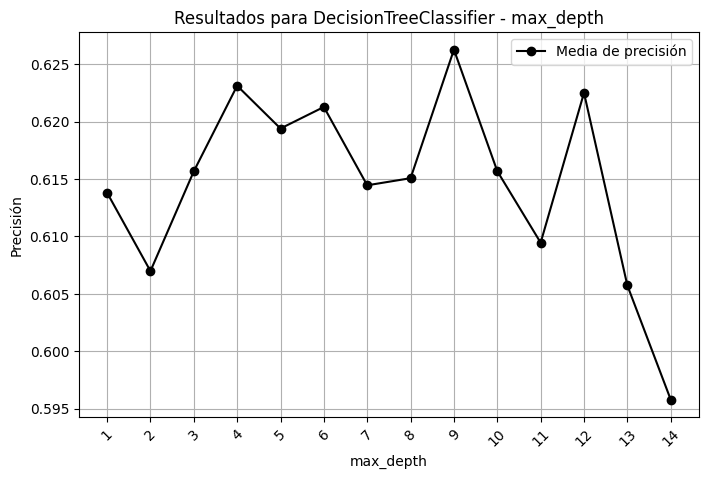

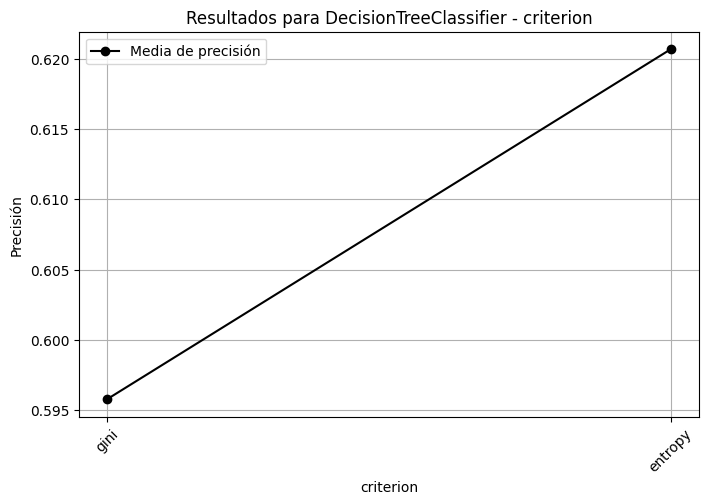

In [ ]:
print("Evaluando DecisionTreeClassifier")
dt_param_grid = {
    "max_depth": range(1, 15),
    "criterion": ["gini", "entropy"]
}
evaluate_and_plot_multiple_params(DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train)


***RandomForestClassifier***

Evaluando RandomForestClassifier


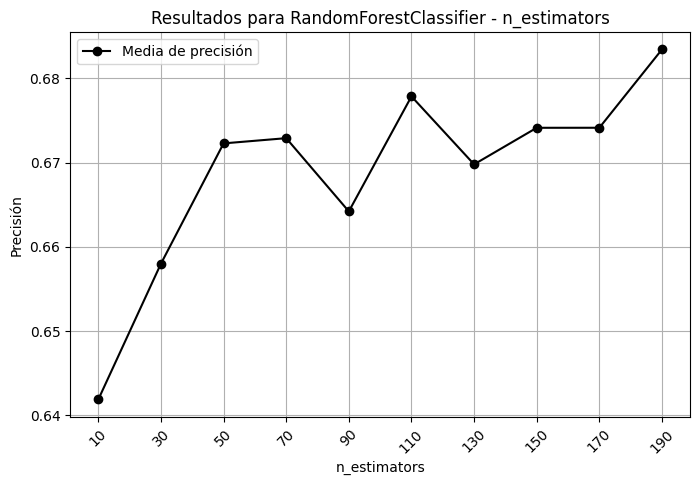

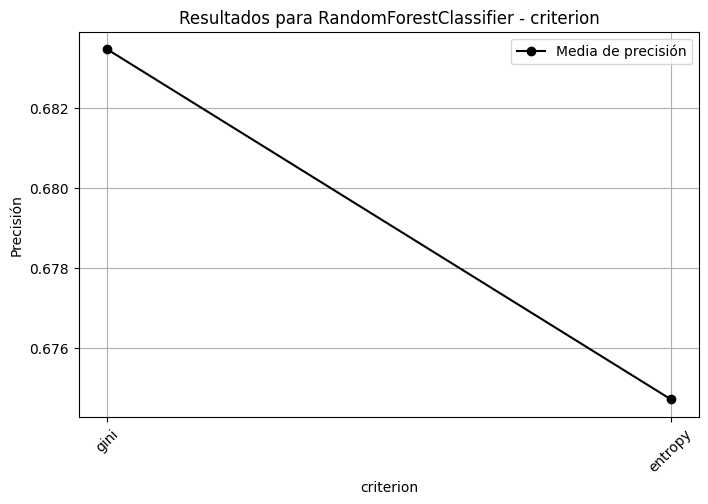

In [ ]:
print("Evaluando RandomForestClassifier")
rf_param_grid = {
    "n_estimators": range(10, 201, 20),
    "criterion": ["gini", "entropy"]
}
evaluate_and_plot_multiple_params(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)

***SVC***

Evaluando SVC


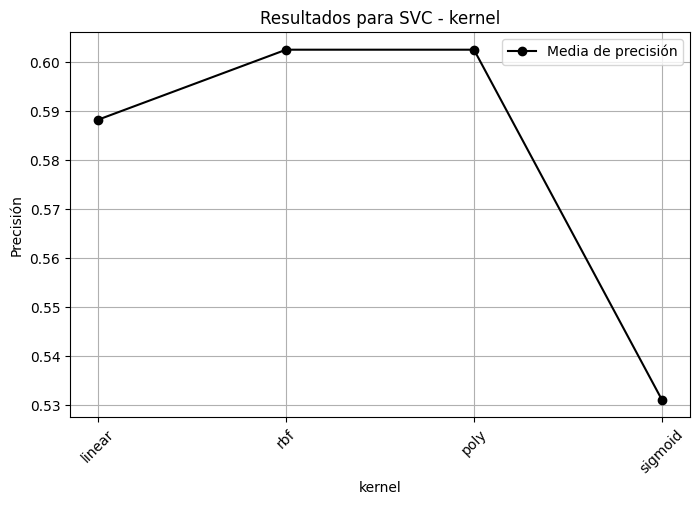

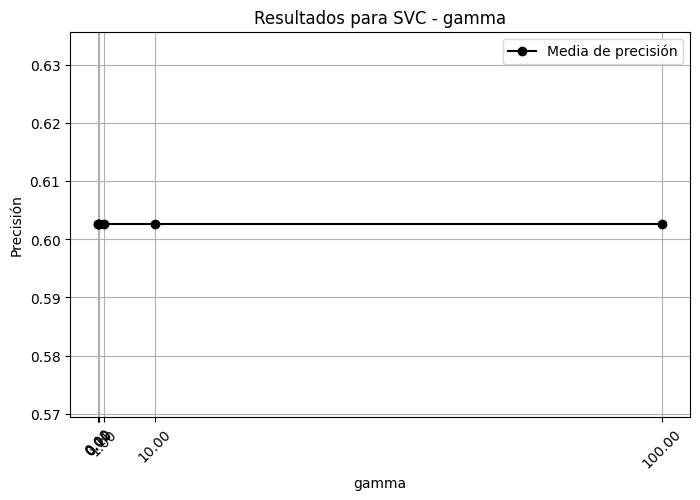

In [ ]:
print("Evaluando SVC")
svc_param_grid = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": np.logspace(-3, 2, 6)
}
evaluate_and_plot_multiple_params(SVC(random_state=42), svc_param_grid, X_train, y_train)

# ***Modelos ajustados***

***Learning curves***

In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

***DecisionTreeClassifier***

In [ ]:
X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = DecisionTreeClassifier(max_depth=9, criterion='entropy')
est.fit(X_train,y_train)
dt = accuracy_score(est.predict(X_test), y_test)
print(dt)

0.630272952853598


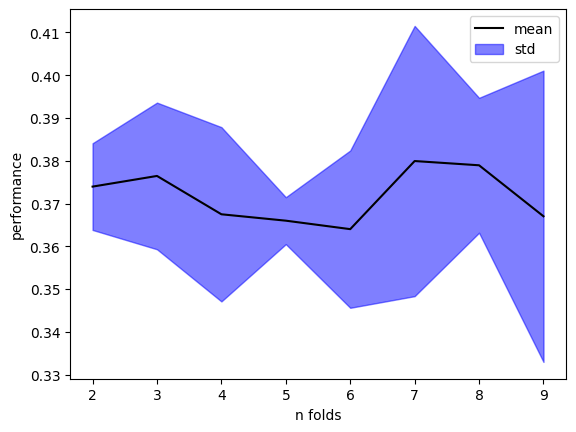

In [ ]:
show_curve(DecisionTreeClassifier(max_depth=9, criterion='entropy'))

***RandomForestClassifier***

In [ ]:
X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = RandomForestClassifier(n_estimators=190, criterion='gini')
est.fit(X_train,y_train)
rf = accuracy_score(est.predict(X_test), y_test)
print(rf)

0.7047146401985112


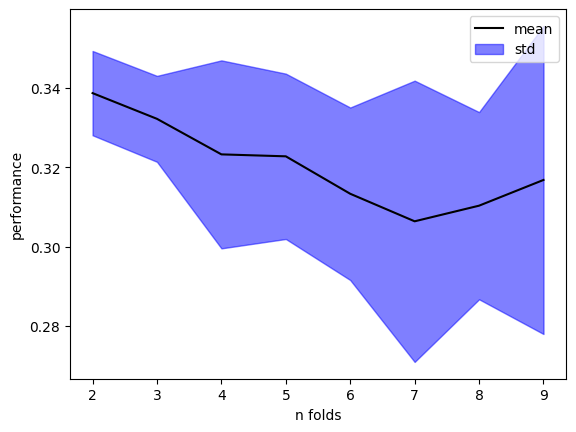

In [ ]:
show_curve(RandomForestClassifier(n_estimators=190, criterion='gini'))

***SVC***

In [ ]:
df = df.dropna()

X = df[df.columns[:-1]]
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = SVC(kernel='rbf', gamma=100)
est.fit(X_train,y_train)
sv = accuracy_score(est.predict(X_test), y_test)
print(sv)

0.598014888337469


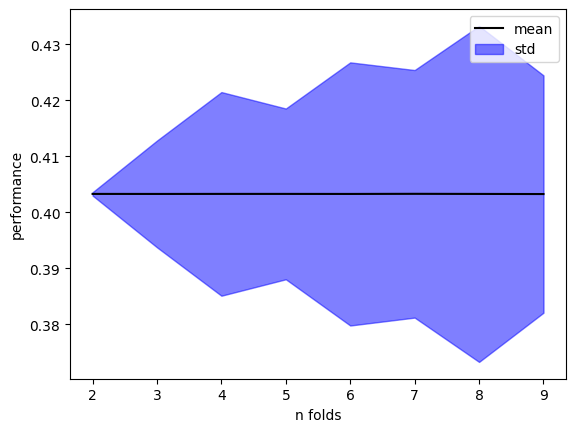

In [ ]:
show_curve(SVC(kernel='rbf', gamma=100))

# **Usando Cross Validation con valores por defecto**

nfolds = 2: Mean Accuracy = 0.5853, Std = 0.0171
nfolds = 3: Mean Accuracy = 0.6057, Std = 0.0087
nfolds = 4: Mean Accuracy = 0.5922, Std = 0.0175
nfolds = 5: Mean Accuracy = 0.5947, Std = 0.0311
nfolds = 6: Mean Accuracy = 0.5893, Std = 0.0266
nfolds = 7: Mean Accuracy = 0.5888, Std = 0.0331
nfolds = 8: Mean Accuracy = 0.6066, Std = 0.0373
nfolds = 9: Mean Accuracy = 0.6012, Std = 0.0302


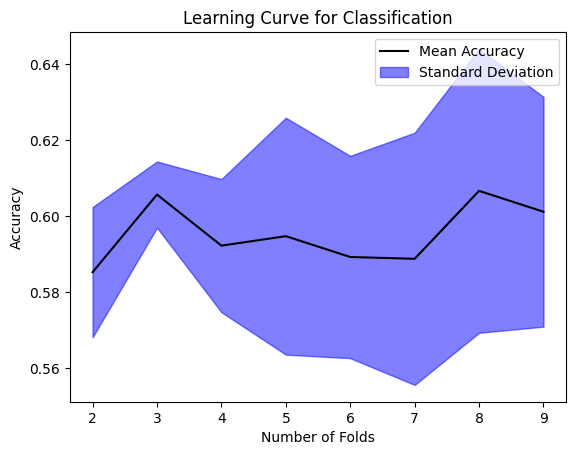

In [ ]:
show_curve(DecisionTreeClassifier())

nfolds = 2: Mean Accuracy = 0.6619, Std = 0.0058
nfolds = 3: Mean Accuracy = 0.6738, Std = 0.0041
nfolds = 4: Mean Accuracy = 0.6798, Std = 0.0123
nfolds = 5: Mean Accuracy = 0.6658, Std = 0.0076
nfolds = 6: Mean Accuracy = 0.6788, Std = 0.0188
nfolds = 7: Mean Accuracy = 0.6748, Std = 0.0300
nfolds = 8: Mean Accuracy = 0.6837, Std = 0.0229
nfolds = 9: Mean Accuracy = 0.6807, Std = 0.0201


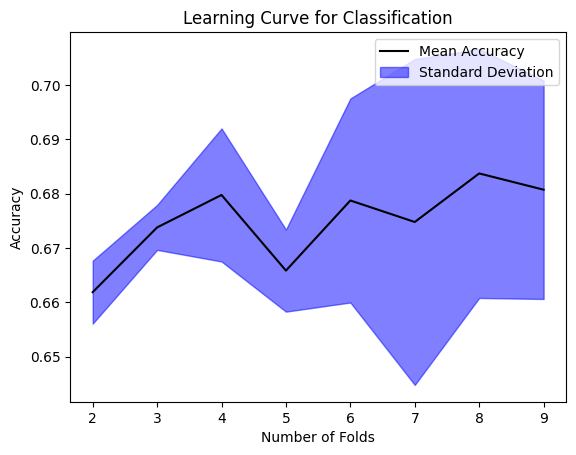

In [ ]:
show_curve(RandomForestClassifier())

nfolds = 2: Mean Accuracy = 0.5967, Std = 0.0017
nfolds = 3: Mean Accuracy = 0.5967, Std = 0.0152
nfolds = 4: Mean Accuracy = 0.5967, Std = 0.0203
nfolds = 5: Mean Accuracy = 0.5967, Std = 0.0224
nfolds = 6: Mean Accuracy = 0.5967, Std = 0.0234
nfolds = 7: Mean Accuracy = 0.5967, Std = 0.0282
nfolds = 8: Mean Accuracy = 0.5967, Std = 0.0191
nfolds = 9: Mean Accuracy = 0.5967, Std = 0.0140


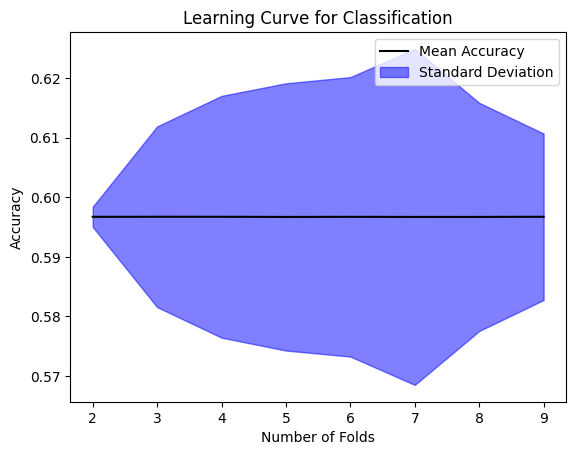

In [ ]:
show_curve(SVC())

# ***Deep learning process***

***3 capas ocultas***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation=tf.nn.softmax)
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=10, verbose=1)

y_pred_3 = model_3.predict(X_test, verbose=1)
accuracy_3 = accuracy_score(y_test, y_pred_3.argmax(axis=1))
print(f"Accuracy con 3 capas ocultas: {accuracy_3:.4f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5188 - loss: 284.1214
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 52.5397
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5325 - loss: 93.2167
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5206 - loss: 85.8781
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 30.4649
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4940 - loss: 26.7176
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5086 - loss: 17.0198
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5245 - loss: 41.7958
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 22.5246
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5282 - loss: 35.1172
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy con 3 capas ocultas: 0.5980


***6 capas ocultas***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation=tf.nn.softmax)
])

model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_6.fit(X_train, y_train, epochs=10, verbose=1)

y_pred_6 = model_6.predict(X_test, verbose=1)
accuracy_6 = accuracy_score(y_test, y_pred_6.argmax(axis=1))
print(f"Accuracy con 6 capas ocultas: {accuracy_6:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5219 - loss: 543.9722
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5050 - loss: 3.0841
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5402 - loss: 0.8355
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5475 - loss: 0.7629
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5226 - loss: 0.7149
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5472 - loss: 0.7840
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5078 - loss: 0.7976
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5192 - loss: 0.7913
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5365 - loss: 0.7392
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5358 - loss: 0.7689
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy con 6 capas ocultas: 0.5980


***10 capas ocultas***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation=tf.nn.softmax)
])

model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_10.fit(X_train, y_train, epochs=10, verbose=1)

y_pred_10 = model_10.predict(X_test, verbose=1)
accuracy_10 = accuracy_score(y_test, y_pred_10.argmax(axis=1))
print(f"Accuracy con 10 capas ocultas: {accuracy_10:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.5237 - loss: 62.3123
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.5732 - loss: 0.7182
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 243ms/step - accuracy: 0.6099 - loss: 0.6764
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - accuracy: 0.5879 - loss: 0.6879
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.5644 - loss: 0.6890
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 0.5659 - loss: 0.6843
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - accuracy: 0.5741 - loss: 0.6838
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - accuracy: 0.5898 - loss: 0.6768
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.5770 - loss: 0.6820
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.6170 - loss: 0.6665
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy con 10 capas ocultas: 0.5980
